In [1]:
from scipy.io import netcdf
import numpy as np
from pylab import clf, plot, show, floor, ceil, imshow
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
#xlabel, ylabel, legend, savefig, colorbar, title, clim, pcolor, cm, contourf
import os
import csv
import sys
import glob
from netCDF4 import Dataset

from IPython.display import display, Math, Latex, Image
from mpl_toolkits.basemap import Basemap
import mpl_toolkits

sys.path.append('/noc/users/am8e13/PyNGL-1.4.0/lib/python2.7/site-packages/PyNGL/')
import Ngl
sys.path.append('/noc/users/am8e13/Python/')
import komod
sys.path.append('/noc/users/am8e13/Python/PyNIO-1.4.0/')
import Nio

from python_functions import *


from IPython.html.widgets import interact, interactive
from IPython.display import clear_output, display, HTML

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days
:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
# Readomg the Nemo and Noaa file
Nemo25 = nemo()
Nemo25.read_nemo('25')
Noaa = noaa()
Noaa.read_noaa()

In [3]:
run36_spinup = spinup()
run36_spinup.readSpin('/scratch/general/am8e13/results36km_newspinup/spinup36km.nc')
run18_spinup = spinup()
run18_spinup.readSpin('/scratch/general/am8e13/results18km_newspinup/spinup18km.nc')

/noc/users/am8e13/anaconda/lib/python2.7/site-packages/scipy/io/netcdf.py:287: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)
  ), category=RuntimeWarning)


In [4]:
obcs = Obcs()
obcs.ReadData('/hpcdata/scratch/am8e13/cs_36km_tutorial/obcsdata/newdownloaded/',12,'_tempmod2',36)
woa = Woa()
phc = Phc()

In [5]:
sponge = StateRead()
sponge.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge/results/',range(1080-90,1080,1))
sponge.baroCalc()
nosponge = StateRead()
nosponge.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_tempcorrobcs/results/',range(720-90,720,1))
nosponge.baroCalc()
sponge.fluxCalc()
nosponge.fluxCalc()

/noc/users/am8e13/anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:598: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


In [27]:
first_spinup = StateRead()
first_spinup.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_tempcorrobcs/results0/',range(90*3,90*3 + 90,1))
first_spinup.baroCalc()
first_spinup.fluxCalc()
first_spinup.title('Old spinup')

first_sponge = StateRead()
first_sponge.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge/results0/',range(1080-90,1080,1))
first_sponge.baroCalc()
first_sponge.fluxCalc()
first_sponge.title('1m sponge')

timescale_1year = StateRead()
timescale_1year.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_timescale/results/',range(1080-90,1080,1))
timescale_1year.baroCalc()
timescale_1year.fluxCalc()
timescale_1year.title('1y Sponge')

nonscaled_obcs_sponge = StateRead()
nonscaled_obcs_sponge.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_timescale/results/',range(1080-90,1080,1))
nonscaled_obcs_sponge.baroCalc()
nonscaled_obcs_sponge.fluxCalc()
nonscaled_obcs_sponge.title('Noscal Sponge')

In [6]:
comp_data = {'nosponge' : nosponge, 'sponge' : sponge , \
             'Nemo25' : Nemo25 ,'woa' : woa, 'Noaa' : Noaa} 

In [28]:
comp_data = {'first_spinup' : first_spinup , 'first_sponge' : first_sponge , 'timescale_1year' : timescale_1year ,\
            'nonscaled_obcs_sponge' : nonscaled_obcs_sponge , 'Noaa' : Noaa}

In [7]:
def interact(field,cmap1,vimin1,vimin2,vimax1,vimax2,time1,time2,z1,z2):
    def plot_field2(vimin=10,vimax=-10,time=0,Z=0):
        # This function plots a 2D field, the field is meant to have NaNs on the land place                                                
        # vimin is the minimun, vimax is the maximum, setbad is the NaN color, unity is the unity in the colorbar                          
        # cmap is a colomap                                                                                                               
        fig,axes = plt.subplots(1,1)
        if len(field.shape) == 3:
            masked_array = np.ma.array(field[time,:,:], mask=np.isnan(field[time,:,:]))
        elif len(field.shape) == 4:
            masked_array = np.ma.array(field[time,Z,:,:], mask=np.isnan(field[time,Z,:,:]))
        elif len(field.shape) == 2:
            masked_array = np.ma.array(field[:,:], mask=np.isnan(field[:,:]))
        cmap= cmap1
        cmap.set_bad('grey',1.)
        ca = imshow(masked_array,vmin = vimin, vmax = vimax, interpolation='nearest',cmap = cmap ,origin="upper")
        cbar = fig.colorbar(ca )
        fig.subplots_adjust(right=2.4,top=2)
        return plot_field2
        
    w = interactive(plot_field2,vimin=(vimin1,vimin2),vimax=(vimax1,vimax2),time=(time1,time2),Z=(z1,z2))
    display(w)

Average of the first 20 years with no sponge on OBCS

In [19]:
#interact(np.nanmean(nosponge.psi,axis=0),matplotlib.cm.seismic,-40,40,-40,40,time1=0,time2=100,z1=0,z2=50)

Average of the first 20 years with sponge on OBCS

In [20]:
#interact(np.nanmean(sponge.psi,axis=0),matplotlib.cm.seismic,-40,40,-40,40,time1=0,time2=100,z1=0,z2=50)

Average of the difference between the first 20 years with no sponge and with sponge on OBCS

In [21]:
#interact(np.nanmean(nosponge.psi,axis=0) - np.nanmean(sponge.psi,axis=0),matplotlib.cm.seismic,-40,40,-40,40,time1=0,time2=100,z1=0,z2=50)

In [25]:
# Arctic Transects
# Barents Strait
barents = [77,-20,79,10]
# Fram Strait
fram = [80,-13,79,10]
# Bering Strait
bering = [64,-169,67,-168]
#Davis Strait
davis = [66,-61,66,-53]
# Arctic 1
arctic1 = [83,-28,74,136]
# Arctic 2
arctic2 = [71,-139,75,53]
# Arctic 3
arctic3 = [78,-115,76,111]
# Arctic 4
arctic4 = [60,180,60,0]

Fram strait

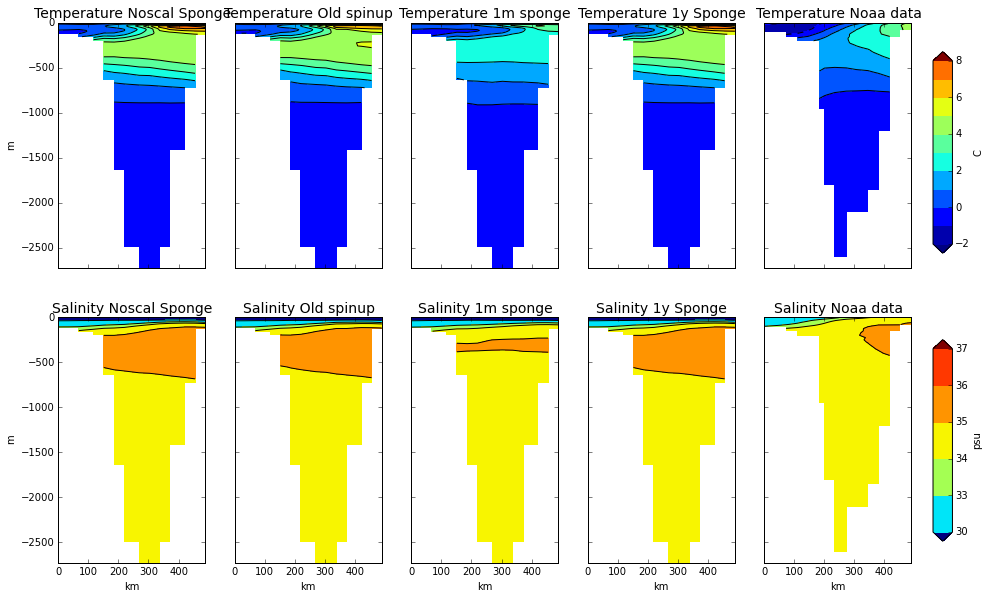

In [30]:
comp_plot(comp_data,fram)

Davis strait

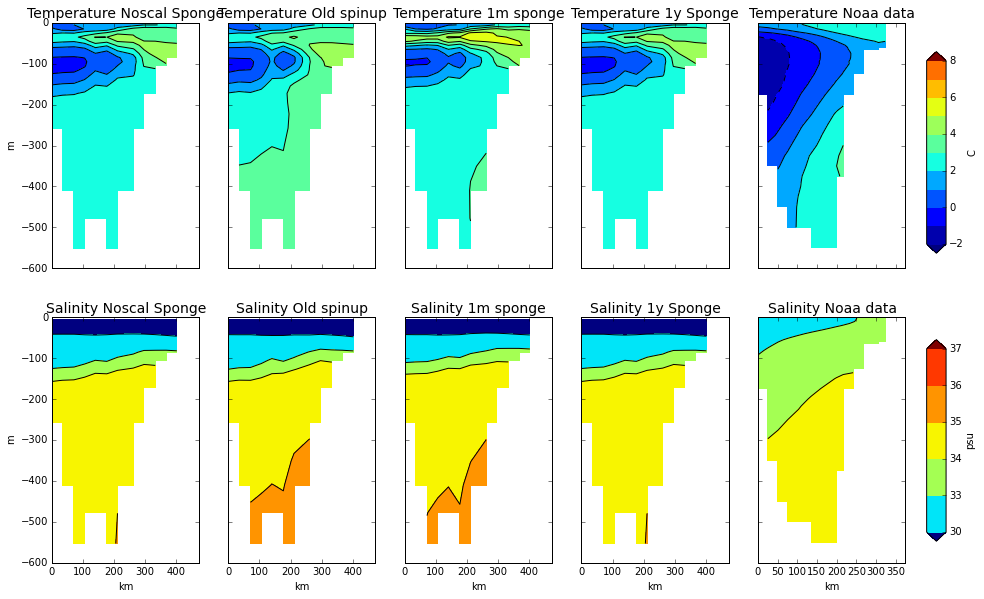

In [31]:
comp_plot(comp_data,davis)

Barents strait

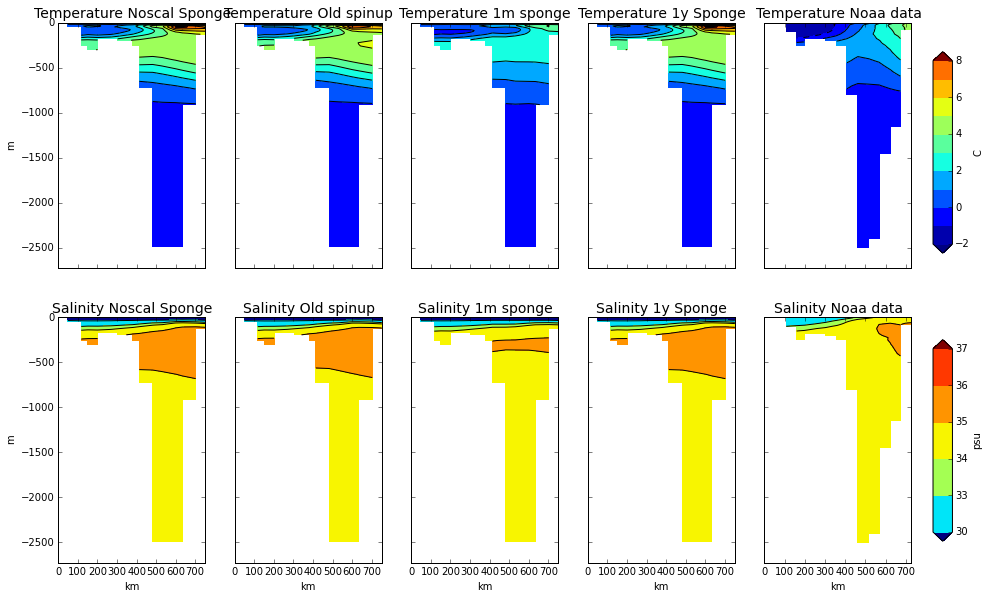

In [32]:
comp_plot(comp_data,barents)

Bering strait

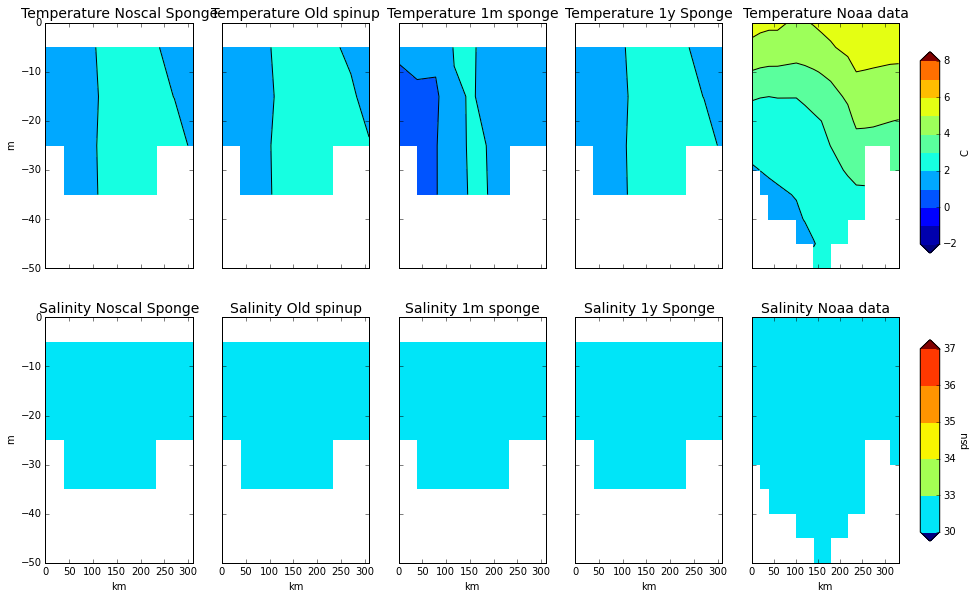

In [33]:
comp_plot(comp_data,bering)

Arctic 1

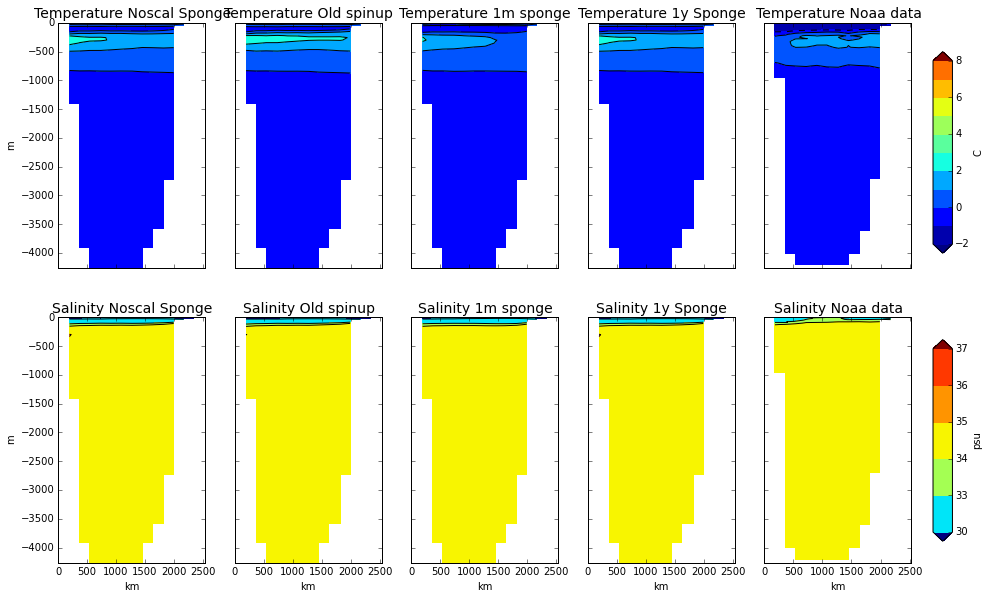

In [34]:
comp_plot(comp_data,arctic1)

In [11]:
liq10 = {'Fram' : {'Inflow' : 3.9, 'Outflow' : -5.5, 'Total flow' : -1.6} ,
             'Barents' : {'Inflow' : -1.2, 'Outflow' : 4.1, 'Total flow' :2.9} ,
             'Bering': {'Inflow' : 1.3, 'Outflow' : 0.0, 'Total flow' :1.3} ,
             'Davis': {'Inflow' : 0.6, 'Outflow' : -3.2, 'Total flow' :-2.6}
            }
core2 =  {'Fram' : {'Inflow' : [], 'Outflow' : [], 'Total flow' : -1.95} ,
             'Barents' : {'Inflow' : [], 'Outflow' : [], 'Total flow' : 2.53} ,
             'Bering': {'Inflow' : [], 'Outflow' : [], 'Total flow' : 0.99} ,
             'Davis': {'Inflow' : [], 'Outflow' : [], 'Total flow' :-1.75}
            }
obs =   {'Fram' : {'Inflow' : [], 'Outflow' : [], 'Total flow' : '-2.0+/-2.7'} ,
             'Barents' : {'Inflow' : -1.2, 'Outflow' : 4.1, 'Total flow' :'2-2.3'} ,
             'Bering': {'Inflow' : [], 'Outflow' : [], 'Total flow' :'0.8+/-0.2'} ,
             'Davis': {'Inflow' : [], 'Outflow' : [], 'Total flow' :'-2.6+/-1.0'}
            }

In [12]:
for var in ['Barents','Bering','Fram','Davis']:
    print var
    print 'spong ',sponge.totalFluxes[var]
    print 'nospo ',nosponge.totalFluxes[var]
    print 'liq10 ',liq10[var]
    print 'Core2 ',core2[var]
    print 'obsv  ',obs[var]

Barents
spong  {'Outflow': -0.84, 'Total flow': -0.26, 'Inflow': 0.59}
nospo  {'Outflow': -0.8, 'Total flow': -0.06, 'Inflow': 0.74}
liq10  {'Outflow': 4.1, 'Total flow': 2.9, 'Inflow': -1.2}
Core2  {'Outflow': [], 'Total flow': 2.53, 'Inflow': []}
obsv   {'Outflow': 4.1, 'Total flow': '2-2.3', 'Inflow': -1.2}
Bering
spong  {'Outflow': -1.09, 'Total flow': -1.07, 'Inflow': 0.02}
nospo  {'Outflow': -1.1, 'Total flow': -1.07, 'Inflow': 0.02}
liq10  {'Outflow': 0.0, 'Total flow': 1.3, 'Inflow': 1.3}
Core2  {'Outflow': [], 'Total flow': 0.99, 'Inflow': []}
obsv   {'Outflow': [], 'Total flow': '0.8+/-0.2', 'Inflow': []}
Fram
spong  {'Outflow': -1.07, 'Total flow': 0.38, 'Inflow': 1.45}
nospo  {'Outflow': -1.13, 'Total flow': 0.74, 'Inflow': 1.88}
liq10  {'Outflow': -5.5, 'Total flow': -1.6, 'Inflow': 3.9}
Core2  {'Outflow': [], 'Total flow': -1.95, 'Inflow': []}
obsv   {'Outflow': [], 'Total flow': '-2.0+/-2.7', 'Inflow': []}
Davis
spong  {'Outflow': -2.12, 'Total flow': -0.25, 'Inflow': 1.

In [44]:
run_36km = MonitorRead()
run_36km.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_tempcorrobcs/results/',[0,518400,1036800,1555200,2073600,2592000])
run_36km.readDynStDiag('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_tempcorrobcs/results/',[0,518400,1036800,1555200,2073600,2592000])
#run_ERA_tempcorr0.readDynStDiag('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_tempcorrobcs/results/',[0,518400,1036800,1555200,2073600,2592000,3110400,3628800,4147200,4665600,5184000,5702400,6220800,6739200,7257600,7776000,8294400,8812800])
run_36km.title('no sponge','blue')

run_sponge = MonitorRead()
run_sponge.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge/results/',[0,777600,1555200,2332800])
run_sponge.readDynStDiag('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge/results/',[0,777600,1555200,2332800])
run_sponge.title('sponge 1m timescale scaled obcs','red')

run_9km = MonitorRead()
run_9km.readData('/hpcdata/scratch/am8e13/run_template_9km/run_tempcorr/results/',[0])
run_9km.readDynStDiag('/hpcdata/scratch/am8e13/run_template_9km/run_tempcorr/results/',[0])
run_9km.title('9 km started with new spin','green')

run_9km1 = MonitorRead()
run_9km1.readData('/hpcdata/scratch/am8e13/run_template_9km/run_tempcorr/resultsfirst/',[0])
run_9km1.readDynStDiag('/hpcdata/scratch/am8e13/run_template_9km/run_tempcorr/resultsfirst/',[0])
run_9km1.title('9 km started with old spin','yellow')

In [45]:
run_sponge_noscaled = MonitorRead()
run_sponge_noscaled.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_noscaled/results/',[0])
run_sponge_noscaled.readDynStDiag('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_noscaled/results/',[0])
run_sponge_noscaled.title('sponge 1m timescale noscaled obcs','purple')

run_sponge_timescale = MonitorRead()
run_sponge_timescale.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_timescale/results/',[0])
run_sponge_timescale.readDynStDiag('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_timescale/results/',[0])
run_sponge_timescale.title('sponge 1y timescale scaled obcs','black')

In [47]:
titles_lv = { 'run_36km' : 'no sponge','run_18km' : 'run 18km' , 'run_9km' : 'run 9km' ,\
             'run_9km1' : 'run_9km1' , 'run_sponge' : 'run_sponge' , 'run_sponge_noscaled' : 'run_sponge_noscaled',\
            'run_sponge_timescale' : 'run_sponge_timescale'}
monitor_list1 = {'run_36km' : run_36km , 'run_sponge' : run_sponge, 'run_sponge_noscaled' : run_sponge_noscaled ,\
                 'run_sponge_timescale' : run_sponge_timescale}

sponge 1m timescale scaled obcs red
no sponge blue
sponge 1y timescale scaled obcs black
sponge 1m timescale noscaled obcs purple


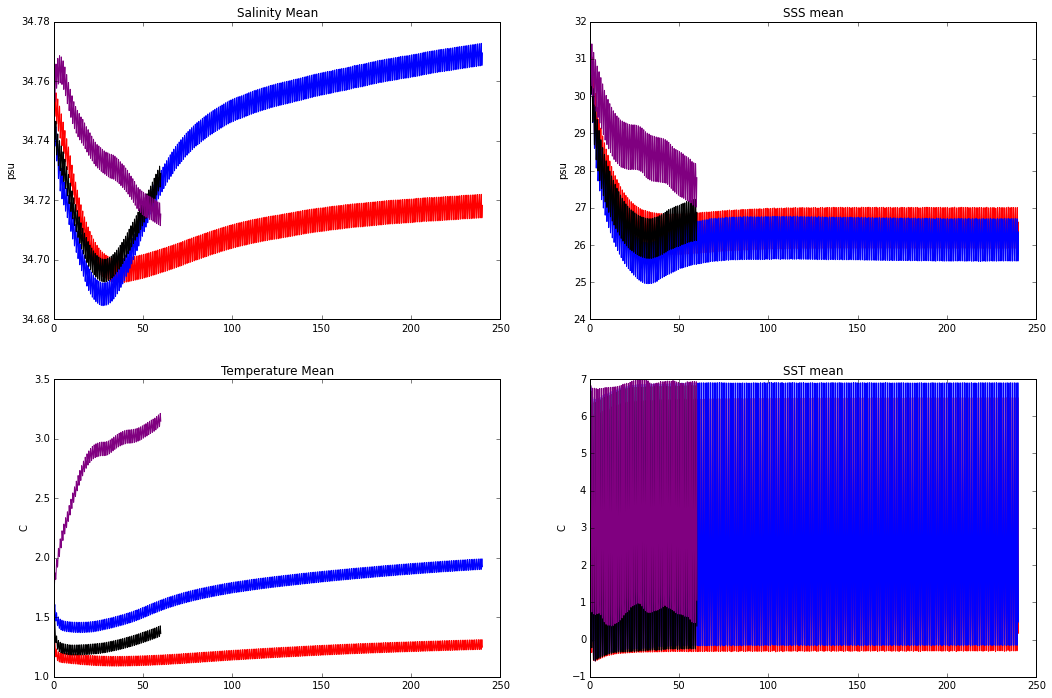

In [48]:
plot_monitor(monitor_list1,['salt_mean','sss_mean','theta_mean','sst_mean'])

sponge 1m timescale scaled obcs red
no sponge blue
sponge 1y timescale scaled obcs black
sponge 1m timescale noscaled obcs purple


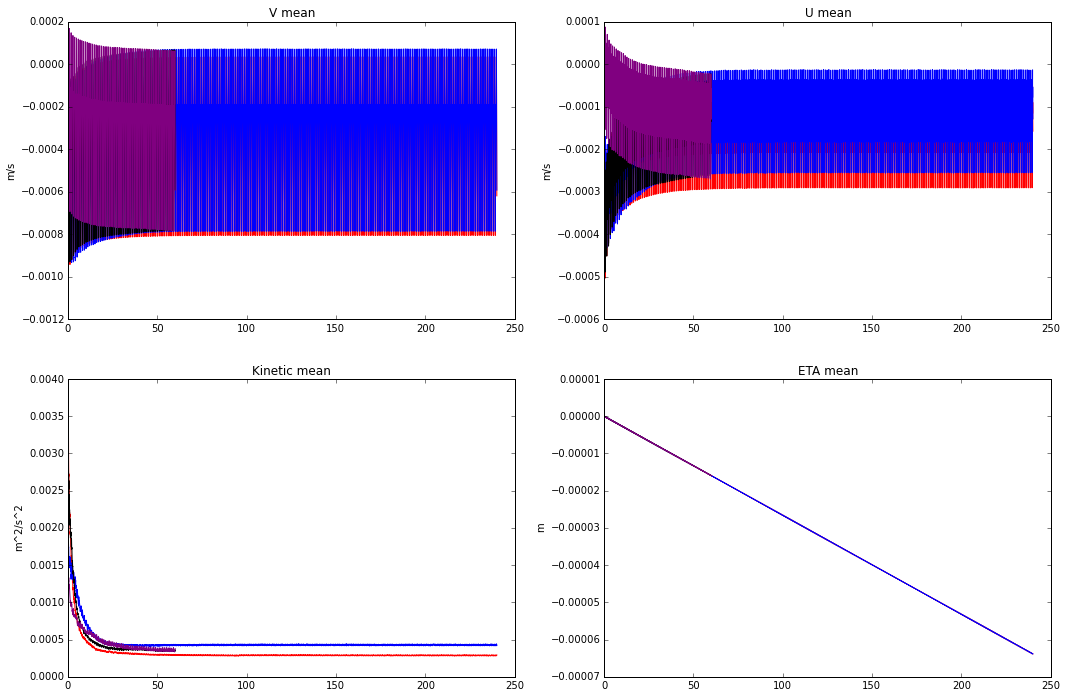

In [49]:
plot_monitor(monitor_list1,['vvel_mean','uvel_mean','ke_mean','eta_mean'])

sponge 1m timescale scaled obcs red
no sponge blue
sponge 1y timescale scaled obcs black
sponge 1m timescale noscaled obcs purple


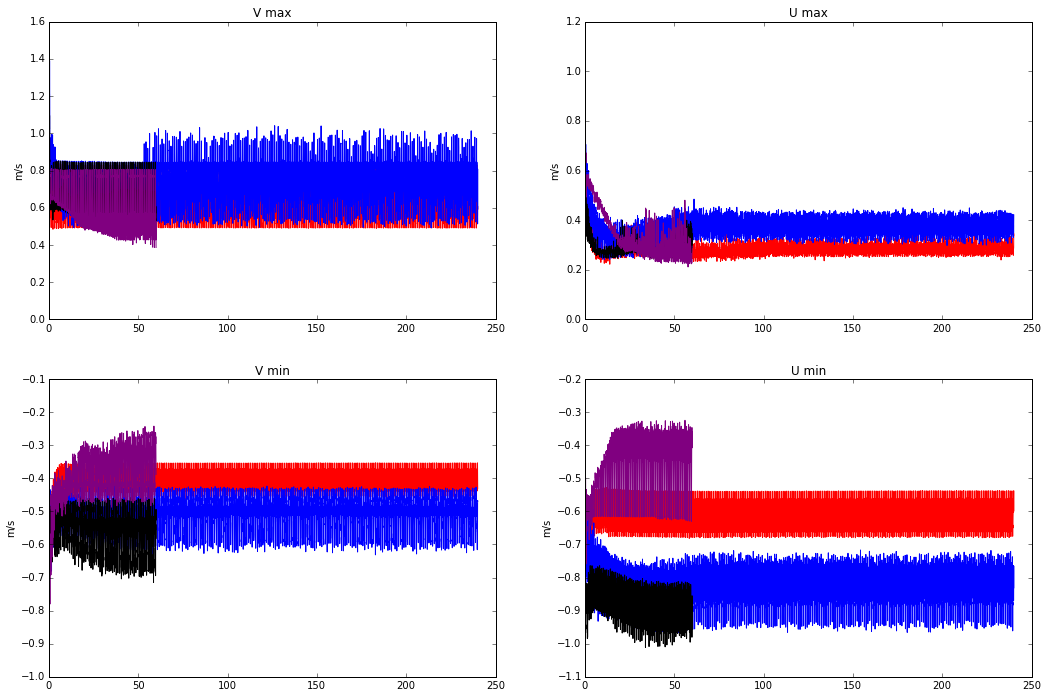

In [50]:
plot_monitor(monitor_list1,['vvel_max','uvel_max','vvel_min','uvel_min'])

sponge 1m timescale scaled obcs red
no sponge blue
sponge 1y timescale scaled obcs black
sponge 1m timescale noscaled obcs purple


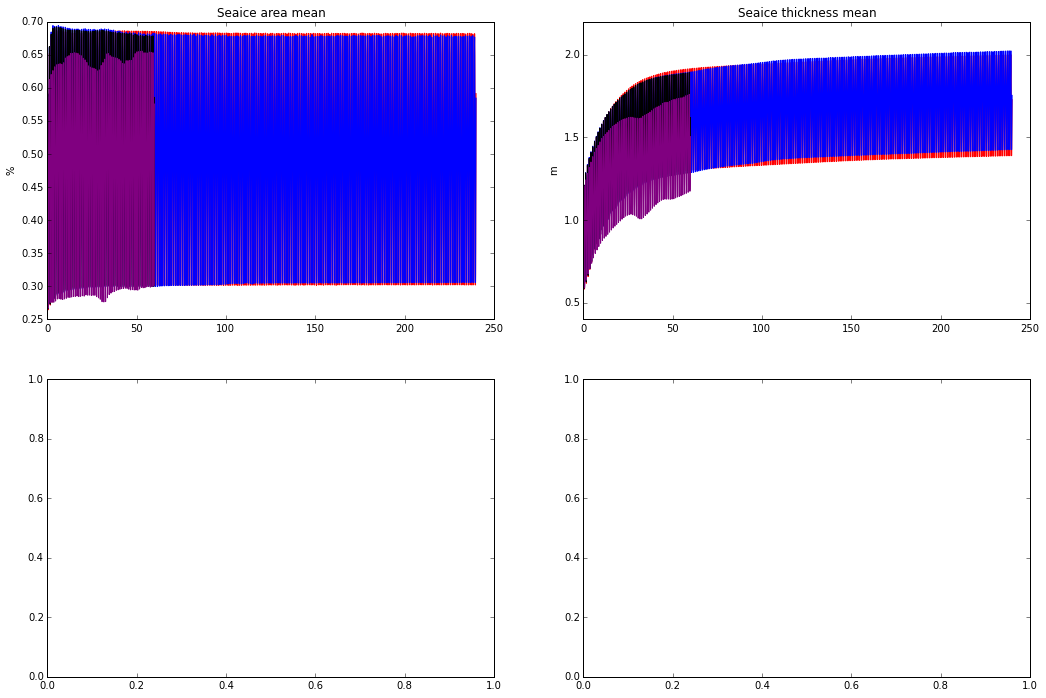

In [51]:
plot_monitor(monitor_list1,['seaice_area_mean','seaice_heff_mean'])

In [183]:
monitor_list1 = {'run_36km' : run_36km , 'run_sponge' : run_sponge, 'run_sponge_noscaled' : run_sponge_noscaled ,\
                 'run_sponge_timescale' : run_sponge_timescale}

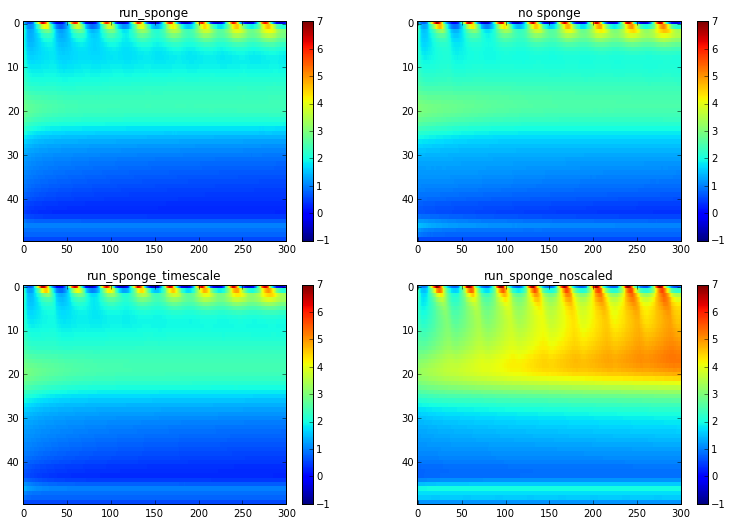

In [185]:
def plot_lv(monitor_list,var,vimin,vimax,cmap,row=2,col=2):
    file2read1 = netcdf.NetCDFFile("/scratch/general/am8e13/results36km/grid.nc",'r')
    Z = file2read1.variables['Zp1']
    Z = Z[0:50]*1
    fig, axes = plt.subplots(nrows=row, ncols=col)
    ax_ind = 0
    for mon in monitor_list:
        #print mon
        ca = axes.flat[ax_ind].imshow(monitor_list[mon].dataDyn[var][0:300,:].T,vmin = vimin, vmax = vimax,\
                    interpolation='nearest', cmap = cmap ,origin='upper', aspect='auto')
        cbar = fig.colorbar(ca , ax=axes.flat[ax_ind], )
        axes.flat[ax_ind].set_title(titles_lv[mon])
        ax_ind += 1
    fig.subplots_adjust(right=1.8,top=1.8)
plot_lv(monitor_list1,'theta_lv_mean',-1,7,matplotlib.cm.jet)

In [162]:
obcs_no = Obcs()
obcs_no.ReadData('/hpcdata/scratch/am8e13/cs_36km_tutorial/obcsdata/newdownloaded/',12,'',36)
obcs1 = Obcs()
obcs1.ReadData('/hpcdata/scratch/am8e13/cs_36km_tutorial/obcsdata/newdownloaded/',12,'_tempmod1',36)
obcs2 = Obcs()
obcs2.ReadData('/hpcdata/scratch/am8e13/cs_36km_tutorial/obcsdata/newdownloaded/',12,'_tempmod2',36)
obcs3 = Obcs()
obcs3.ReadData('/hpcdata/scratch/am8e13/cs_36km_tutorial/obcsdata/newdownloaded/',12,'_tempmod3',36)

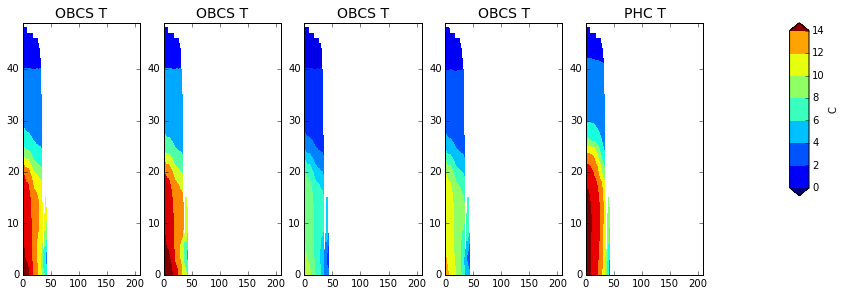

In [164]:
plot_obcs(obcs1,obcs_no,obcs2,obcs3,phc,loc='N',var='T',vmin=-1,vmax=18)

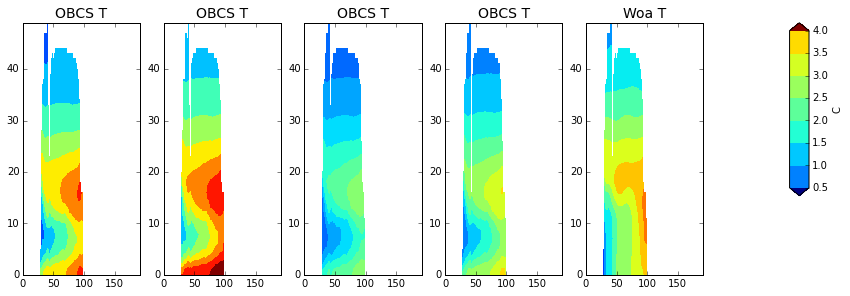

In [170]:
plot_obcs(obcs1,obcs_no,obcs2,obcs3,woa,loc='E',var='T',vmin=-1,vmax=6)

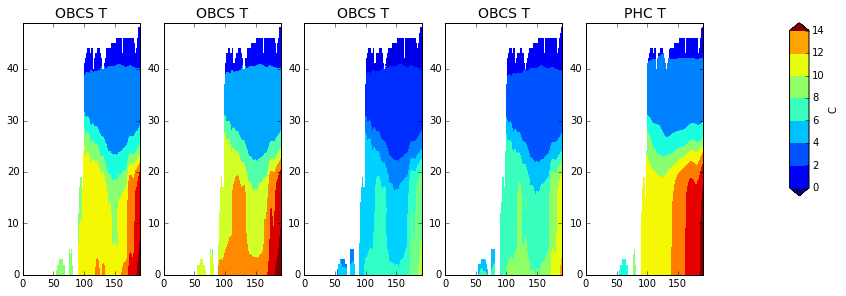

In [166]:
plot_obcs(obcs1,obcs_no,obcs2,obcs3,phc,loc='W',var='T',vmin=-1,vmax=18)